# Tuning synthetic data with fista algorithm

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib.ticker import MaxNLocator

from Function import *
from skimage.metrics import structural_similarity as ssim

import scipy

## Load synthetic data

In [2]:
data_name = 'data.npy'
x = np.load('../Desarrollo/ReDS/data/' + data_name)
if len(x.shape) > 2:
    x = x[:, :, int(x.shape[-1] / 2)]

if data_name == 'data.npy':
    x = x.T
x = x / np.abs(x).max()
max_itr = 100

## Visualize data

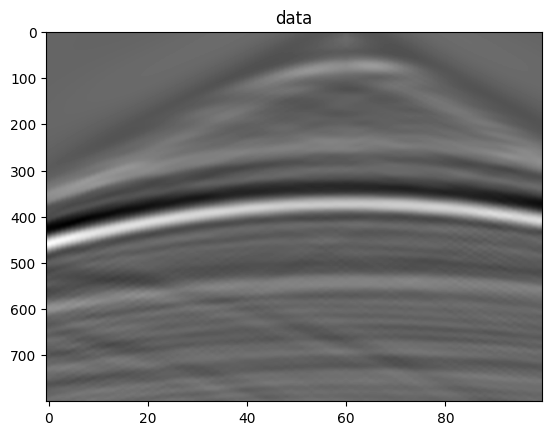

(<matplotlib.image.AxesImage at 0x16e0391e0a0>, Text(0.5, 1.0, 'data'), None)

In [5]:
plt.imshow(x, cmap='gray', aspect='auto'), plt.title('data'), plt.show()

## Sampling data

In [5]:
sr_rand = 0.5  # 1-compression
y_rand, pattern_rand, pattern_index = random_sampling(x, sr_rand, seed=0)
H = pattern_index

## Recovery algorithm FISTA

In [8]:
case = 'FISTA'
alg = Algorithms(x, H, 'DCT2D', 'IDCT2D')
lmbs = np.logspace(np.log10(1), np.log10(20), 15)

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': 0.39
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 1
H.shape=(40000, 80000)
1 	 Error: 1.00e+00 	 PSNR: 15.584 dB 	 SSIM: 0.223 	 TV norm:  1716.25 

2 	 Error: 3.79e-01 	 PSNR: 15.597 dB 	 SSIM: 0.225 	 TV norm:  3059.20 

3 	 Error: 2.29e-01 	 PSNR: 15.612 dB 	 SSIM: 0.228 	 TV norm:  3940.13 

4 	 Error: 1.30e-01 	 PSNR: 15.631 dB 	 SSIM: 0.231 	 TV norm:  4408.39 

5 	 Error: 6.49e-02 	 PSNR: 15.651 dB 	 SSIM: 0.235 	 TV norm:  4580.66 

6 	 Error: 2.37e-02 	 PSNR: 15.674 dB 	 SSIM: 0.239 	 TV norm:  4583.56 

7 	 Error: 5.57e-03 	 PSNR: 15.700 dB 	 SSIM: 0.243 	 TV norm:  4518.66 

8 	 Error: 1.06e-02 	 PSNR: 15.728 dB 	 SSIM: 0.247 	 TV norm:  4449.42 

9 	 Error: 1.12e-02 	 PSNR: 15.758 dB 	 SSIM: 0.251 	 TV norm:  4403.87 

10 	 Error: 8.92e-03 	 PSNR: 15.790 dB 	 SSIM: 0.255 	 TV norm:  4385.53 

11 	 Error: 7.30e-03 	 PSNR: 15.824 dB 	 SSIM: 0.260 	 TV norm:  4385.99 

12 	 Error: 7.38e-03 	 PSNR: 15.861 dB 	 SSIM: 0.264 	 TV norm:  4394.14 

13 	 Error: 7.86e-03 	 PSNR: 15.900 dB 	 SSIM: 0.269 	 TV norm:  4401.42

## Plot performance

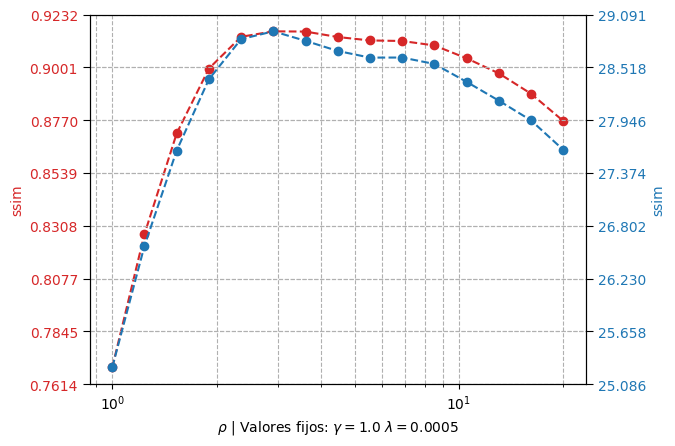

In [11]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(r'$\rho$ | Valores fijos: $\mu=0.39$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

# Running algorithm with real data

In [7]:
data_name = 'cube4.npy'
x = np.load('../Desarrollo/ReDS/data/' + data_name)
if len(x.shape) > 2:
    x = x[:, :, int(x.shape[-1] / 2)]

if data_name == 'data.npy':
    x = x.T
x = x / np.abs(x).max()

## Visualize real data

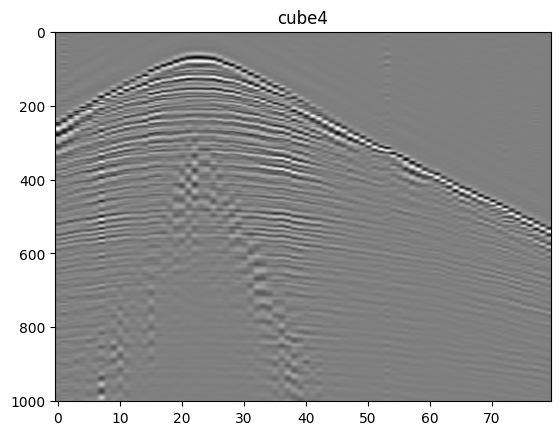

(<matplotlib.image.AxesImage at 0x16e0398b6d0>, Text(0.5, 1.0, 'cube4'), None)

In [8]:
plt.imshow(x, cmap='gray', aspect='auto'), plt.title('cube4'), plt.show()

## sampling data

In [10]:
sr_rand = 0.5  # 1-compression
y_rand, pattern_rand, pattern_index = random_sampling(x, sr_rand, seed=0)
H = pattern_index

## Recovery algorithm Fista

In [19]:
case = 'FISTA'
alg = Algorithms(x, H, 'DCT2D', 'IDCT2D')
lmbs = np.logspace(np.log10(50), np.log10(1000), 25)
max_itr = 300

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': 0.39
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 1
H.shape=(40040, 80080)
1 	 Error: 1.00e+00 	 PSNR: 16.345 dB 	 SSIM: 0.419 	 TV norm:  1652.79 

2 	 Error: 3.94e-01 	 PSNR: 16.351 dB 	 SSIM: 0.382 	 TV norm:  3092.07 

3 	 Error: 2.53e-01 	 PSNR: 16.324 dB 	 SSIM: 0.336 	 TV norm:  4218.06 

4 	 Error: 1.67e-01 	 PSNR: 16.273 dB 	 SSIM: 0.295 	 TV norm:  5034.84 

5 	 Error: 1.15e-01 	 PSNR: 16.212 dB 	 SSIM: 0.262 	 TV norm:  5596.80 

6 	 Error: 8.45e-02 	 PSNR: 16.152 dB 	 SSIM: 0.238 	 TV norm:  5975.53 

7 	 Error: 6.72e-02 	 PSNR: 16.100 dB 	 SSIM: 0.220 	 TV norm:  6237.08 

8 	 Error: 5.65e-02 	 PSNR: 16.055 dB 	 SSIM: 0.207 	 TV norm:  6421.98 

9 	 Error: 4.84e-02 	 PSNR: 16.016 dB 	 SSIM: 0.197 	 TV norm:  6561.58 

10 	 Error: 4.14e-02 	 PSNR: 15.983 dB 	 SSIM: 0.189 	 TV norm:  6672.35 

11 	 Error: 3.55e-02 	 PSNR: 15.955 dB 	 SSIM: 0.183 	 TV norm:  6760.00 

12 	 Error: 3.06e-02 	 PSNR: 15.934 dB 	 SSIM: 0.179 	 TV norm:  6830.62 

13 	 Error: 2.68e-02 	 PSNR: 15.915 dB 	 SSIM: 0.176 	 TV norm:  6887.18

C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\Function.py:773: RuntimeWarning: invalid value encountered in double_scalars
  residualx = np.linalg.norm(x - x_old) / np.linalg.norm(x)


14 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

15 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

16 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

17 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

18 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

19 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

20 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

21 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

22 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

23 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

24 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

25 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

26 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

27 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

28 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.

## Plot performance

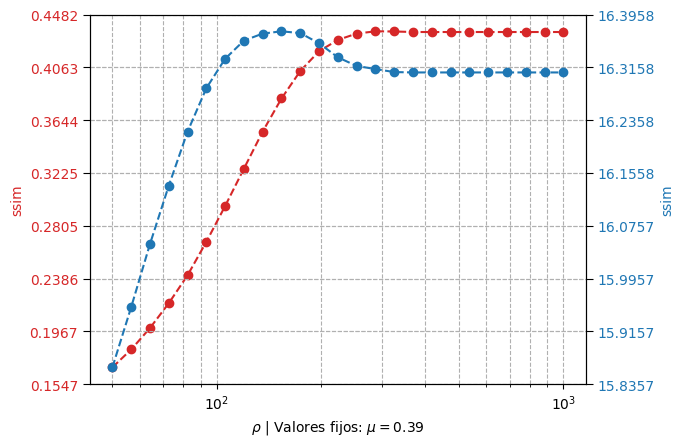

In [20]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(r'$\rho$ | Valores fijos: $\mu=0.39$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

## Probando con $\mu = 0.01$

In [24]:
case = 'FISTA'
alg = Algorithms(x, H, 'DCT2D', 'IDCT2D')
lmbs = np.logspace(np.log10(0.0001), np.log10(10), 25)
max_itr = 300

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': 0.01
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 1
H.shape=(40040, 80080)
1 	 Error: 1.00e+00 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  59.14 

2 	 Error: 4.97e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  134.17 

3 	 Error: 3.87e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  224.21 

4 	 Error: 3.17e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  328.44 

5 	 Error: 2.69e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  446.08 

6 	 Error: 2.33e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  576.33 

7 	 Error: 2.05e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  718.37 

8 	 Error: 1.83e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  871.36 

9 	 Error: 1.64e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  1034.42 

10 	 Error: 1.49e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  1206.65 

11 	 Error: 1.36e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  1387.13 

12 	 Error: 1.25e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  1574.90 

13 	 Error: 1.15e-01 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  1769.02 

14 	 E

C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\Function.py:773: RuntimeWarning: invalid value encountered in double_scalars
  residualx = np.linalg.norm(x - x_old) / np.linalg.norm(x)


1 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

2 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

3 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

4 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

5 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

6 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

7 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

8 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

9 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

10 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

11 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

12 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

13 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

14 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

15 	 Error: nan 	 PSNR: 16.308 dB 	 SSIM: 0.434 	 TV norm:  0.00 

16 	

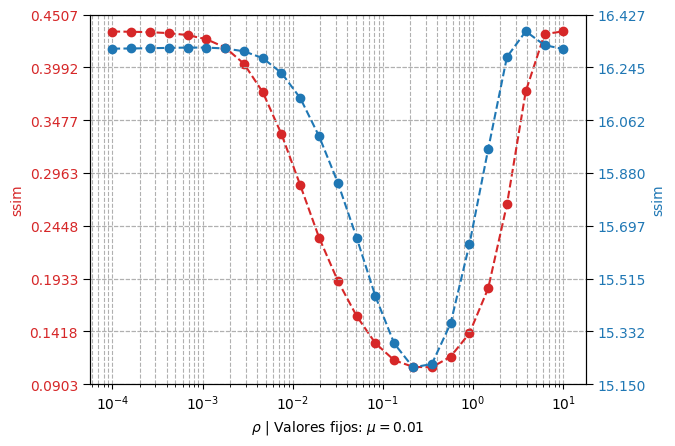

In [25]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(r'$\rho$ | Valores fijos: $\mu=0.01$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

# Observaciones finales

* Se debe estandarizar la lectura de los parametros, e.g. un rango entre cero y uno.
* Se debe mejorar la reconstrucción de datos reales o más realistas.